In [4]:
using Revise
using QuantumClifford.ECC
# using Nemo, LinearAlgebra
import PyQDecoders
import Nemo: GF, Perm
import LinearAlgebra

In [2]:
import Pkg
Pkg.activate()
Pkg.status()

  Activating project at `~/.julia/environments/v1.10`


Status `~/.julia/environments/v1.10/Project.toml`
  [c3fe647b] AbstractAlgebra v0.41.9
⌃ [e30172f5] Documenter v1.4.1
  [daee34ce] DocumenterCitations v1.3.3
⌃ [7073ff75] IJulia v1.24.2
  [2b0e0bc5] LanguageServer v4.5.1
⌃ [2edaba10] Nemo v0.45.5
⌃ [91a5bcdd] Plots v1.40.4
  [17f5de1a] PyQDecoders v0.2.1
  [6099a3de] PythonCall v0.9.20
  [b0d11df0] Quantikz v1.3.1
  [0525e862] QuantumClifford v0.9.5 `../../../Documents/Repos/QuantumClifford.jl`
  [5717a53b] QuantumInterface v0.3.4
  [fb686558] RandomExtensions v0.4.4
⌃ [295af30f] Revise v3.5.14
  [37e2e46d] LinearAlgebra
Info Packages marked with ⌃ have new versions available and may be upgradable.


In [3]:
# Pkg.resolve()

## Simple example

In [5]:
R = PermutationGroupRing(GF(2), 20)
A = Matrix(R[Dict(Perm(20) => 1) Dict(Perm(20) => 1); Perm(vcat([1,3,2], 4:20)) Dict(Perm(20) => 1)])
c = LiftedCode(A)
parity_checks(c)


40×40 Matrix{Int64}:
 1  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  1  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  1  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  1  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  1  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  1  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  1  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  1  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  1  0  0  0  0     1  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  1  0  0  0     0  1  0  0  0  0  0  0  0  0  0  0
 ⋮              ⋮              ⋮        ⋱        ⋮              ⋮           
 0  0  0  0  0  0  0  0  0  0  0  1  0     0  0  0  1  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  1     0

In [6]:
lpc = LPCode(c, c)
lpc |> parity_checks

+ X___________________________________⋯_____________________________________
+ _X__________________________________⋯_____________________________________
+ __X_________________________________⋯_____________________________________
+ ___X________________________________⋯_____________________________________
+ ____X_______________________________⋯_____________________________________
+ _____X______________________________⋯_____________________________________
+ ______X_____________________________⋯_____________________________________
+ _______X____________________________⋯_____________________________________
+ ________X___________________________⋯_____________________________________
 ⋮
+ ____________________________________⋯_____________________________Z_______
+ ____________________________________⋯______________________________Z______
+ ____________________________________⋯_______________________________Z_____
+ ____________________________________⋯________________________________Z_

## 2111.07029

### 155 qubits

Example 1, page 16,  [155, 64, 20], l = 31

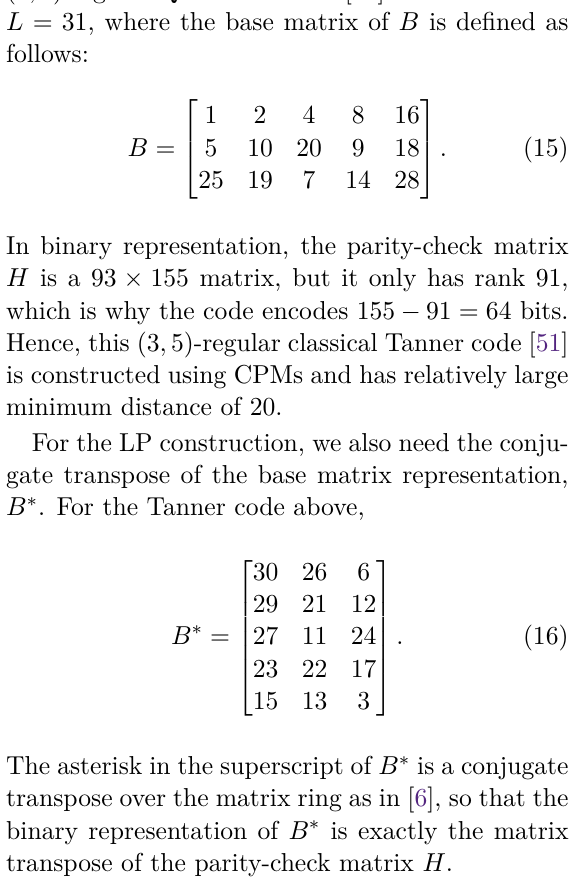

In [101]:
R1 = PermutationGroupRing(GF(2), 31)

PermGroupRing{Nemo.FqFieldElem}(Prime field of characteristic 2, 31, #undef)

In [102]:
B = [
    1 2 4 8 16;
    5 10 20 9 18;
    25 19 7 14 28]
    
A = map(B) do x
    R1(cyclic_permutation(x, 31))
end

3×5 Matrix{PermGroupRingElem{Nemo.FqFieldElem}}:
 PermGroupRingElem{FqFieldElem}(Dict{Perm{Int64}, FqFieldElem}((1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29 …=>1), PermGroupRing{FqFieldElem}(Prime field of characteristic 2, 31, #undef))  …  PermGroupRingElem{FqFieldElem}(Dict{Perm{Int64}, FqFieldElem}((1,17,2,18,3,19,4,20,5,21,6,22,7,23,8,24,9,25,10,26,11,27,12,28,13,29,14,30,15 …=>1), PermGroupRing{FqFieldElem}(Prime field of characteristic 2, 31, #undef))
 PermGroupRingElem{FqFieldElem}(Dict{Perm{Int64}, FqFieldElem}((1,6,11,16,21,26,31,5,10,15,20,25,30,4,9,14,19,24,29,3,8,13,18,23,28,2,7,12,17 …=>1), PermGroupRing{FqFieldElem}(Prime field of characteristic 2, 31, #undef))     PermGroupRingElem{FqFieldElem}(Dict{Perm{Int64}, FqFieldElem}((1,19,6,24,11,29,16,3,21,8,26,13,31,18,5,23,10,28,15,2,20,7,25,12,30,17,4,22,9 …=>1), PermGroupRing{FqFieldElem}(Prime field of characteristic 2, 31, #undef))
 PermGroupRingElem{FqFieldElem}(Dict{Perm{Int64}, FqField

In [103]:
code1 = LPCode(LiftedCode(A), LiftedCode(A))

LPCode{PermGroupRingElem{Nemo.FqFieldElem}}(LiftedCode{PermGroupRingElem{Nemo.FqFieldElem}}(PermGroupRingElem{Nemo.FqFieldElem}[PermGroupRingElem{Nemo.FqFieldElem}(Dict{Perm{Int64}, Nemo.FqFieldElem}((1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29 … => 1), PermGroupRing{Nemo.FqFieldElem}(Prime field of characteristic 2, 31, #undef)) PermGroupRingElem{Nemo.FqFieldElem}(Dict{Perm{Int64}, Nemo.FqFieldElem}((1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,2,4,6,8,10,12,14,16,18,20,22,24,26 … => 1), PermGroupRing{Nemo.FqFieldElem}(Prime field of characteristic 2, 31, #undef)) … PermGroupRingElem{Nemo.FqFieldElem}(Dict{Perm{Int64}, Nemo.FqFieldElem}((1,9,17,25,2,10,18,26,3,11,19,27,4,12,20,28,5,13,21,29,6,14,22,30,7,15,23,31,8 … => 1), PermGroupRing{Nemo.FqFieldElem}(Prime field of characteristic 2, 31, #undef)) PermGroupRingElem{Nemo.FqFieldElem}(Dict{Perm{Int64}, Nemo.FqFieldElem}((1,17,2,18,3,19,4,20,5,21,6,22,7,23,8,24,9,25,10,26,11,27,12,28,13,29,14,30,15 … => 

In [41]:
parity_checks(code1)

+ _X__________________________________⋯_____________________________________
+ __X_________________________________⋯_____________________________________
+ ___X________________________________⋯_____________________________________
+ ____X_______________________________⋯_____________________________________
+ _____X______________________________⋯_____________________________________
+ ______X_____________________________⋯_____________________________________
+ _______X____________________________⋯_____________________________________
+ ________X___________________________⋯_____________________________________
+ _________X__________________________⋯_____________________________________
 ⋮
+ ____________________________________⋯________________________________Z____
+ ____________________________________⋯_________________________________Z___
+ ____________________________________⋯__________________________________Z__
+ ____________________________________⋯__________________________________

In [42]:
code_n(code1)

1054

In [43]:
code_k(code1)

140

In [44]:
Hx = parity_checks_x(code1)
Hz = parity_checks_z(code1)

465×1054 Matrix{Int64}:
 0  1  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  1  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  1  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  1  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  1  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  1  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  1  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  1  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  1  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  1  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 ⋮              ⋮              ⋮        ⋱           ⋮              ⋮        
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  1  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0   

In [78]:
import PyQDecoders

noise = 0.001
d = code1->PyBeliefPropOSDecoder(code1, maxiter=10)
s = CommutationCheckECCSetup(noise)
e = evaluate_decoder(d(code1), s, 1000)

┌ Warning: `faults_matrix` was called on an ECC that has redundant rows (is rank-deficient). `faults_matrix` corrected for that, however this is a frequent source of mistakes and inefficiencies. We advise you remove redundant rows from your ECC.
└ @ QuantumClifford.ECC /home/yuxuan/Documents/Repos/QuantumClifford.jl/src/ecc/ECC.jl:298
┌ Warning: `faults_matrix` was called on an ECC that has redundant rows (is rank-deficient). `faults_matrix` corrected for that, however this is a frequent source of mistakes and inefficiencies. We advise you remove redundant rows from your ECC.
└ @ QuantumClifford.ECC /home/yuxuan/Documents/Repos/QuantumClifford.jl/src/ecc/ECC.jl:298


0.0

In [79]:
noise = 0.01
d = code1->PyBeliefPropOSDecoder(code1, maxiter=10)
s = CommutationCheckECCSetup(noise)
e = evaluate_decoder(d(code1), s, 100)

┌ Warning: `faults_matrix` was called on an ECC that has redundant rows (is rank-deficient). `faults_matrix` corrected for that, however this is a frequent source of mistakes and inefficiencies. We advise you remove redundant rows from your ECC.
└ @ QuantumClifford.ECC /home/yuxuan/Documents/Repos/QuantumClifford.jl/src/ecc/ECC.jl:298
┌ Warning: `faults_matrix` was called on an ECC that has redundant rows (is rank-deficient). `faults_matrix` corrected for that, however this is a frequent source of mistakes and inefficiencies. We advise you remove redundant rows from your ECC.
└ @ QuantumClifford.ECC /home/yuxuan/Documents/Repos/QuantumClifford.jl/src/ecc/ECC.jl:298


0.05

In [25]:
# import PyQDecoders: PyBeliefPropOSDecoder

codes = [code1]

# codes = [
#     # TODO
# ]

noise = 0.001

setups = [
    CommutationCheckECCSetup(noise),
    NaiveSyndromeECCSetup(noise, 0),
    ShorSyndromeECCSetup(noise, 0),
]

for c in codes
    for s in setups
        for d in [c->PyBeliefPropOSDecoder(c, maxiter=10)]
            e = evaluate_decoder(d(c), s, 100000)
            @show c
            @show s
            @show e
            @assert max(e...) < noise/4
        end
    end
end

### LP04 and LP118 families 

In [104]:
B04 = Dict()

B04[7] = [
    0 0 0 0;
    0 1 2 5;
    0 6 3 1
]

B04[9] = [
    0 0 0 0;
    0 1 6 7;
    0 4 5 2
]

B04[17] = [
    0 0 0 0;
    0 1 2 11;
    0 8 12 13
]

B04[19] = [
    0 0 0 0;
    0 2 6 9;
    0 16 7 11
]


3×4 Matrix{Int64}:
 0   0  0   0
 0   2  6   9
 0  16  7  11

In [105]:
B118 = Dict()

B118[16] = [
    0 0 0 0 0;
    0 2 4 7 11;
    0 3 10 14 15
]

B118[21] = [
    0 0 0 0 0;
    0 4 5 7 17;
    0 14 18 12 11
]

B118[30] = [
    0 0 0 0 0;
    0 2 14 24 25;
    0 16 11 14 13
]

3×5 Matrix{Int64}:
 0   0   0   0   0
 0   2  14  24  25
 0  16  11  14  13

In [106]:
LP04 = Dict()
for l in keys(B04)
    A =  map(B04[l]) do x
        (PermutationGroupRing(GF(2), l))(cyclic_permutation(x, l))
    end
    LP04[l] = LPCode(LiftedCode(A), LiftedCode(A))
end

In [107]:
LP118 = Dict()
for l in keys(B118)
    A =  map(B118[l]) do x
        (PermutationGroupRing(GF(2), l))(cyclic_permutation(x, l))
    end
    LP118[l] = LPCode(LiftedCode(A), LiftedCode(A))
end

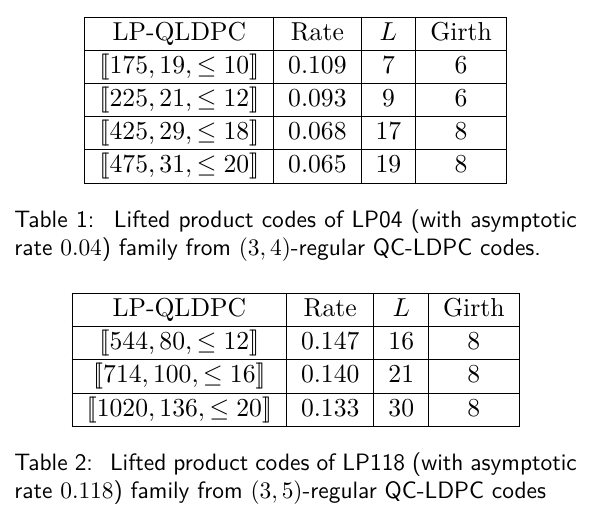

In [108]:
for (l, c) in LP04
    @show l, code_n(c), code_k(c)
end

for (l, c) in LP118
    @show l, code_n(c), code_k(c)
end

(l, code_n(c), code_k(c)) = (7, 175, 19)
(l, code_n(c), code_k(c)) = (9, 225, 21)
(l, code_n(c), code_k(c)) = (17, 425, 29)
(l, code_n(c), code_k(c)) = (19, 475, 31)
(l, code_n(c), code_k(c)) = (16, 544, 80)
(l, code_n(c), code_k(c)) = (21, 714, 100)
(l, code_n(c), code_k(c)) = (30, 1020, 136)


In [112]:
noise = 0.001
l = 7
code = LP04[l]
d = code->PyBeliefPropOSDecoder(code, maxiter=10)
s = CommutationCheckECCSetup(noise)
e = evaluate_decoder(d(code), s, 100000)

┌ Warning: `faults_matrix` was called on an ECC that has redundant rows (is rank-deficient). `faults_matrix` corrected for that, however this is a frequent source of mistakes and inefficiencies. We advise you remove redundant rows from your ECC.
└ @ QuantumClifford.ECC /home/yuxuan/Documents/Repos/QuantumClifford.jl/src/ecc/ECC.jl:298
┌ Warning: `faults_matrix` was called on an ECC that has redundant rows (is rank-deficient). `faults_matrix` corrected for that, however this is a frequent source of mistakes and inefficiencies. We advise you remove redundant rows from your ECC.
└ @ QuantumClifford.ECC /home/yuxuan/Documents/Repos/QuantumClifford.jl/src/ecc/ECC.jl:298


6.0e-5

In [113]:
noise = 0.005
l = 7
code = LP04[l]
d = code->PyBeliefPropOSDecoder(code, maxiter=10)
s = CommutationCheckECCSetup(noise)
e = evaluate_decoder(d(code), s, 100000)

┌ Warning: `faults_matrix` was called on an ECC that has redundant rows (is rank-deficient). `faults_matrix` corrected for that, however this is a frequent source of mistakes and inefficiencies. We advise you remove redundant rows from your ECC.
└ @ QuantumClifford.ECC /home/yuxuan/Documents/Repos/QuantumClifford.jl/src/ecc/ECC.jl:298
┌ Warning: `faults_matrix` was called on an ECC that has redundant rows (is rank-deficient). `faults_matrix` corrected for that, however this is a frequent source of mistakes and inefficiencies. We advise you remove redundant rows from your ECC.
└ @ QuantumClifford.ECC /home/yuxuan/Documents/Repos/QuantumClifford.jl/src/ecc/ECC.jl:298


0.0031

In [119]:
# codes = values(LP04)

noise = 0.001

setups = [
    CommutationCheckECCSetup(noise),
    # NaiveSyndromeECCSetup(noise, 0),
    # ShorSyndromeECCSetup(noise, 0),
]

for (l, c) in LP04
    for s in setups
        for d in [c->PyBeliefPropOSDecoder(c, maxiter=10)]
            @show l
            # @show c
            @show s
            @time begin
                e = evaluate_decoder(d(c), s, 100000)
                # e = evaluate_decoder(d(c), s, 10000) # fewer shots to be faster
            end
            @show e
            @assert max(e...) < noise/4
        end
    end
end

l = 7
s = CommutationCheckECCSetup(0.001)


┌ Warning: `faults_matrix` was called on an ECC that has redundant rows (is rank-deficient). `faults_matrix` corrected for that, however this is a frequent source of mistakes and inefficiencies. We advise you remove redundant rows from your ECC.
└ @ QuantumClifford.ECC /home/yuxuan/Documents/Repos/QuantumClifford.jl/src/ecc/ECC.jl:298
┌ Warning: `faults_matrix` was called on an ECC that has redundant rows (is rank-deficient). `faults_matrix` corrected for that, however this is a frequent source of mistakes and inefficiencies. We advise you remove redundant rows from your ECC.
└ @ QuantumClifford.ECC /home/yuxuan/Documents/Repos/QuantumClifford.jl/src/ecc/ECC.jl:298


 10.905748 seconds (12.71 M allocations: 785.566 MiB, 2.26% gc time, 0.02% compilation time)
e = 5.0e-5
l = 9
s = CommutationCheckECCSetup(0.001)


┌ Warning: `faults_matrix` was called on an ECC that has redundant rows (is rank-deficient). `faults_matrix` corrected for that, however this is a frequent source of mistakes and inefficiencies. We advise you remove redundant rows from your ECC.
└ @ QuantumClifford.ECC /home/yuxuan/Documents/Repos/QuantumClifford.jl/src/ecc/ECC.jl:298
┌ Warning: `faults_matrix` was called on an ECC that has redundant rows (is rank-deficient). `faults_matrix` corrected for that, however this is a frequent source of mistakes and inefficiencies. We advise you remove redundant rows from your ECC.
└ @ QuantumClifford.ECC /home/yuxuan/Documents/Repos/QuantumClifford.jl/src/ecc/ECC.jl:298


 15.745683 seconds (12.69 M allocations: 885.503 MiB, 1.30% gc time)
e = 0.0
l = 17
s = CommutationCheckECCSetup(0.001)


┌ Warning: `faults_matrix` was called on an ECC that has redundant rows (is rank-deficient). `faults_matrix` corrected for that, however this is a frequent source of mistakes and inefficiencies. We advise you remove redundant rows from your ECC.
└ @ QuantumClifford.ECC /home/yuxuan/Documents/Repos/QuantumClifford.jl/src/ecc/ECC.jl:298
┌ Warning: `faults_matrix` was called on an ECC that has redundant rows (is rank-deficient). `faults_matrix` corrected for that, however this is a frequent source of mistakes and inefficiencies. We advise you remove redundant rows from your ECC.
└ @ QuantumClifford.ECC /home/yuxuan/Documents/Repos/QuantumClifford.jl/src/ecc/ECC.jl:298


 92.727176 seconds (12.76 M allocations: 1.262 GiB, 0.55% gc time)
e = 0.0
l = 19
s = CommutationCheckECCSetup(0.001)


┌ Warning: `faults_matrix` was called on an ECC that has redundant rows (is rank-deficient). `faults_matrix` corrected for that, however this is a frequent source of mistakes and inefficiencies. We advise you remove redundant rows from your ECC.
└ @ QuantumClifford.ECC /home/yuxuan/Documents/Repos/QuantumClifford.jl/src/ecc/ECC.jl:298
┌ Warning: `faults_matrix` was called on an ECC that has redundant rows (is rank-deficient). `faults_matrix` corrected for that, however this is a frequent source of mistakes and inefficiencies. We advise you remove redundant rows from your ECC.
└ @ QuantumClifford.ECC /home/yuxuan/Documents/Repos/QuantumClifford.jl/src/ecc/ECC.jl:298


145.327434 seconds (12.76 M allocations: 1.360 GiB, 0.16% gc time)
e = 1.0e-5


In [121]:
noise = 0.001

setups = [
    CommutationCheckECCSetup(noise),
    # NaiveSyndromeECCSetup(noise, 0),
    # ShorSyndromeECCSetup(noise, 0),
]

for (l, c) in LP118
    for s in setups
        for d in [c->PyBeliefPropOSDecoder(c, maxiter=10)]
            @show l
            # @show c
            @show s
            @time begin
                # e = evaluate_decoder(d(c), s, 100000)
                e = evaluate_decoder(d(c), s, 1000) # fewer shots to be faster
            end
            @show e
            @assert max(e...) < noise/4
        end
    end
end

l = 16
s = CommutationCheckECCSetup(0.001)


┌ Warning: `faults_matrix` was called on an ECC that has redundant rows (is rank-deficient). `faults_matrix` corrected for that, however this is a frequent source of mistakes and inefficiencies. We advise you remove redundant rows from your ECC.
└ @ QuantumClifford.ECC /home/yuxuan/Documents/Repos/QuantumClifford.jl/src/ecc/ECC.jl:298
┌ Warning: `faults_matrix` was called on an ECC that has redundant rows (is rank-deficient). `faults_matrix` corrected for that, however this is a frequent source of mistakes and inefficiencies. We advise you remove redundant rows from your ECC.
└ @ QuantumClifford.ECC /home/yuxuan/Documents/Repos/QuantumClifford.jl/src/ecc/ECC.jl:298


  2.411702 seconds (464.44 k allocations: 101.688 MiB, 0.86% gc time, 43.09% compilation time)
e = 0.0
l = 21
s = CommutationCheckECCSetup(0.001)


┌ Warning: `faults_matrix` was called on an ECC that has redundant rows (is rank-deficient). `faults_matrix` corrected for that, however this is a frequent source of mistakes and inefficiencies. We advise you remove redundant rows from your ECC.
└ @ QuantumClifford.ECC /home/yuxuan/Documents/Repos/QuantumClifford.jl/src/ecc/ECC.jl:298
┌ Warning: `faults_matrix` was called on an ECC that has redundant rows (is rank-deficient). `faults_matrix` corrected for that, however this is a frequent source of mistakes and inefficiencies. We advise you remove redundant rows from your ECC.
└ @ QuantumClifford.ECC /home/yuxuan/Documents/Repos/QuantumClifford.jl/src/ecc/ECC.jl:298


  7.453452 seconds (518.46 k allocations: 172.590 MiB, 0.24% gc time, 18.76% compilation time)
e = 0.0
l = 30
s = CommutationCheckECCSetup(0.001)


┌ Warning: `faults_matrix` was called on an ECC that has redundant rows (is rank-deficient). `faults_matrix` corrected for that, however this is a frequent source of mistakes and inefficiencies. We advise you remove redundant rows from your ECC.
└ @ QuantumClifford.ECC /home/yuxuan/Documents/Repos/QuantumClifford.jl/src/ecc/ECC.jl:298
┌ Warning: `faults_matrix` was called on an ECC that has redundant rows (is rank-deficient). `faults_matrix` corrected for that, however this is a frequent source of mistakes and inefficiencies. We advise you remove redundant rows from your ECC.
└ @ QuantumClifford.ECC /home/yuxuan/Documents/Repos/QuantumClifford.jl/src/ecc/ECC.jl:298


 14.936200 seconds (601.33 k allocations: 296.346 MiB, 0.25% gc time, 13.96% compilation time)
e = 0.0


## Quantum 5, 585 (2021)

In [117]:
# more_codes = []
l = 63
R = PermutationGroupRing(GF(2), l)
A = zeros(R, 7,7)
A[LinearAlgebra.diagind(A)] .= R(cyclic_permutation(27, l))
A[LinearAlgebra.diagind(A, -1)] .= R(cyclic_permutation(54, l))
A[LinearAlgebra.diagind(A, 6)] .= R(cyclic_permutation(54, l))
A[LinearAlgebra.diagind(A, -2)] .= R(1)
A[LinearAlgebra.diagind(A, 5)] .= R(1)

B = zeros(R, 1, 1)
B[1,1] = (R(1) + R(cyclic_permutation(1, l)) + R(cyclic_permutation(6, l)))' #' # adjoint due to different notations
code = LPCode(LiftedCode(A), LiftedCode(B))


LPCode{PermGroupRingElem{Nemo.FqFieldElem}}(LiftedCode{PermGroupRingElem{Nemo.FqFieldElem}}(PermGroupRingElem{Nemo.FqFieldElem}[PermGroupRingElem{Nemo.FqFieldElem}(Dict{Perm{Int64}, Nemo.FqFieldElem}((1,28,55,19,46,10,37)(2,29,56,20,47,11,38)(3,30,57,21,48,12,39)(4,31,58,22,49, … => 1), PermGroupRing{Nemo.FqFieldElem}(Prime field of characteristic 2, 63, #undef)) PermGroupRingElem{Nemo.FqFieldElem}(Dict{Perm, Nemo.FqFieldElem}(), PermGroupRing{Nemo.FqFieldElem}(Prime field of characteristic 2, 63, #undef)) … PermGroupRingElem{Nemo.FqFieldElem}(Dict{Perm{Int64}, Nemo.FqFieldElem}(() => 1), PermGroupRing{Nemo.FqFieldElem}(Prime field of characteristic 2, 63, #undef)) PermGroupRingElem{Nemo.FqFieldElem}(Dict{Perm{Int64}, Nemo.FqFieldElem}((1,55,46,37,28,19,10)(2,56,47,38,29,20,11)(3,57,48,39,30,21,12)(4,58,49,40,31, … => 1), PermGroupRing{Nemo.FqFieldElem}(Prime field of characteristic 2, 63, #undef)); PermGroupRingElem{Nemo.FqFieldElem}(Dict{Perm{Int64}, Nemo.FqFieldElem}((1,55,46,37,28,

In [118]:
code_n(code)

882

In [119]:
code_k(code)

24

In [120]:
d = code->PyBeliefPropOSDecoder(code, maxiter=10)
s = CommutationCheckECCSetup(noise)
e = evaluate_decoder(d(code), s, 100)

┌ Warning: `faults_matrix` was called on an ECC that has redundant rows (is rank-deficient). `faults_matrix` corrected for that, however this is a frequent source of mistakes and inefficiencies. We advise you remove redundant rows from your ECC.
└ @ QuantumClifford.ECC /home/yuxuan/Documents/Repos/QuantumClifford.jl/src/ecc/ECC.jl:298
┌ Warning: `faults_matrix` was called on an ECC that has redundant rows (is rank-deficient). `faults_matrix` corrected for that, however this is a frequent source of mistakes and inefficiencies. We advise you remove redundant rows from your ECC.
└ @ QuantumClifford.ECC /home/yuxuan/Documents/Repos/QuantumClifford.jl/src/ecc/ECC.jl:298


0.0

In [79]:
# more_codes = []
l = 63
R = PermutationGroupRing(GF(2), l)
A = zeros(R, 7,7)
A[LinearAlgebra.diagind(A)] .= R(cyclic_permutation(27, l))
A[LinearAlgebra.diagind(A, -1)] .= R(1)
A[LinearAlgebra.diagind(A, 6)] .= R(1)
A[LinearAlgebra.diagind(A, -2)] .= R(cyclic_permutation(27, l))
A[LinearAlgebra.diagind(A, 5)] .= R(cyclic_permutation(27, l))
A[LinearAlgebra.diagind(A, -3)] .= R(cyclic_permutation(18, l))
A[LinearAlgebra.diagind(A, 4)] .= R(cyclic_permutation(18, l))
A[LinearAlgebra.diagind(A, -4)] .= R(1)
A[LinearAlgebra.diagind(A, 3)] .= R(1)

B = zeros(R, 1, 1)
B[1,1] = (R(1) + R(cyclic_permutation(1, l)) + R(cyclic_permutation(6, l)))' # adjoint due to different notations
code = LPCode(LiftedCode(A), LiftedCode(B))

LPCode{PermGroupRingElem{Nemo.FqFieldElem}}(LiftedCode{PermGroupRingElem{Nemo.FqFieldElem}}(PermGroupRingElem{Nemo.FqFieldElem}[PermGroupRingElem{Nemo.FqFieldElem}(Dict{Perm{Int64}, Nemo.FqFieldElem}((1,28,55,19,46,10,37)(2,29,56,20,47,11,38)(3,30,57,21,48,12,39)(4,31,58,22,49, … => 1), PermGroupRing{Nemo.FqFieldElem}(Prime field of characteristic 2, 63, #undef)) PermGroupRingElem{Nemo.FqFieldElem}(Dict{Perm, Nemo.FqFieldElem}(), PermGroupRing{Nemo.FqFieldElem}(Prime field of characteristic 2, 63, #undef)) … PermGroupRingElem{Nemo.FqFieldElem}(Dict{Perm{Int64}, Nemo.FqFieldElem}((1,28,55,19,46,10,37)(2,29,56,20,47,11,38)(3,30,57,21,48,12,39)(4,31,58,22,49, … => 1), PermGroupRing{Nemo.FqFieldElem}(Prime field of characteristic 2, 63, #undef)) PermGroupRingElem{Nemo.FqFieldElem}(Dict{Perm{Int64}, Nemo.FqFieldElem}(() => 1), PermGroupRing{Nemo.FqFieldElem}(Prime field of characteristic 2, 63, #undef)); PermGroupRingElem{Nemo.FqFieldElem}(Dict{Perm{Int64}, Nemo.FqFieldElem}(() => 1), PermG

In [80]:
code_n(code)

882

In [81]:
code_k(code)

48

In [13]:
# """Hypergraph product of two classical codes."""
# function hgp_debug(h₁,h₂)
#     r₁, n₁ = size(h₁)
#     r₂, n₂ = size(h₂)
#     hx = hcat(kron(h₁, LinearAlgebra.I(n₂)), kron(LinearAlgebra.I(r₁), h₂'))
#     hz = hcat(kron(LinearAlgebra.I(n₁), h₂), kron(h₁', LinearAlgebra.I(r₂)))
#     hx, hz
# end

In [15]:
# hx, hz = hgp_debug(A,B)

In [82]:
# parity_checks_x(code)

## Quantum 7, 1005 (2023)

In [5]:
l = 63
R = PermutationGroupRing(GF(2), l)

A = zeros(R, 7, 7)
A[LinearAlgebra.diagind(A)] .= R(cyclic_permutation(36, l))
A[LinearAlgebra.diagind(A, -1)] .= R(cyclic_permutation(9, l))
A[LinearAlgebra.diagind(A, 6)] .= R(cyclic_permutation(9, l))
A[LinearAlgebra.diagind(A, -2)] .= R(1)
A[LinearAlgebra.diagind(A, 5)] .= R(1)

B = zeros(R, 1, 1)
B[1,1] = (R(1) + R(cyclic_permutation(1, l)) + R(cyclic_permutation(6, l))) # adjoint due to different notations

code = LPCode(LiftedCode(A), LiftedCode(B))

LPCode{PermGroupRingElem{Nemo.FqFieldElem}}(LiftedCode{PermGroupRingElem{Nemo.FqFieldElem}}(PermGroupRingElem{Nemo.FqFieldElem}[PermGroupRingElem{Nemo.FqFieldElem}(Dict{Perm{Int64}, Nemo.FqFieldElem}((1,37,10,46,19,55,28)(2,38,11,47,20,56,29)(3,39,12,48,21,57,30)(4,40,13,49,22, … => 1), PermGroupRing{Nemo.FqFieldElem}(Prime field of characteristic 2, 63, #undef)) PermGroupRingElem{Nemo.FqFieldElem}(Dict{Perm, Nemo.FqFieldElem}(), PermGroupRing{Nemo.FqFieldElem}(Prime field of characteristic 2, 63, #undef)) … PermGroupRingElem{Nemo.FqFieldElem}(Dict{Perm{Int64}, Nemo.FqFieldElem}(() => 1), PermGroupRing{Nemo.FqFieldElem}(Prime field of characteristic 2, 63, #undef)) PermGroupRingElem{Nemo.FqFieldElem}(Dict{Perm{Int64}, Nemo.FqFieldElem}((1,10,19,28,37,46,55)(2,11,20,29,38,47,56)(3,12,21,30,39,48,57)(4,13,22,31,40, … => 1), PermGroupRing{Nemo.FqFieldElem}(Prime field of characteristic 2, 63, #undef)); PermGroupRingElem{Nemo.FqFieldElem}(Dict{Perm{Int64}, Nemo.FqFieldElem}((1,10,19,28,37,

In [8]:
code_k(LiftedCode(B))

6

In [7]:
code_k(code)

24

In [7]:
# import Nemo: residue_ring, matrix_space, ZZ
# import LinearAlgebra: rank

# function mod2rank(h::Matrix{<:Integer})
#     Z2, _ = residue_ring(ZZ, 2)
#     S = matrix_space(Z2, size(h)...)
#     rank(S(h))
# end

In [99]:
# mod2rank(parity_checks(LiftedCode(B)))

57

In [3]:
# parity_checks(LiftedCode(B))

In [96]:
# code_n(LiftedCode(B))

63

In [84]:
# code_k(code)

24